In [37]:
import tweepy as tw
import os,re
import time

# authenticating with twitter api...

consumer_key = 'nh6VWZcfcM2qAZVUjhkZ3Ek4z'
consumer_secret = 'WwwPOnj3PdpHaZPpMVEULKxW6N7zIERbVpuRCIAp72QXdKsX62'
access_token = '1686143983-ZZ9WNyqKwU1T2XU4iLhnvBlF3kKiSgXfals1Vgf'
access_token_secret = 'QG16ygCMsJ6JEcdF5TJoeclDaWJND3CQqCSpdUEV9kr8R'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)
tweets = []
locations = []
# getting top recent 2000 items from official dda handle...

for i in tw.Cursor(api.search,"official_dda",tweet_mode = 'extended',lang = 'en').items(2000):
        k = dict(i._json)
        tweet = k['full_text']
        location  = k['user']['location']
        location  = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",location).split())
        locations.append(location)
        tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
        tweet = tweet.replace("RT","")
        tweets.append(tweet)


In [38]:
# polarity checking using textblob class.....

import textblob
polarity = [textblob.TextBlob(i).sentiment.polarity  for i in tweets]
for i in range(len(polarity)):
    if polarity[i] > 0:
        polarity[i] = 1
    elif polarity[i] < 0:
        polarity[i] = -1
    else:
        polarity[i] = 0

In [39]:
# creating dataframe with tweet,location,polarity...
import pandas as pd

df = pd.DataFrame(tweets,columns=['Tweets'])
df['Locations'] = locations
df['Polarity'] = polarity
df['lenght'] = df['Tweets'].str.len()

Text(0.5, 1.0, '10 Frequently Occuring Words')

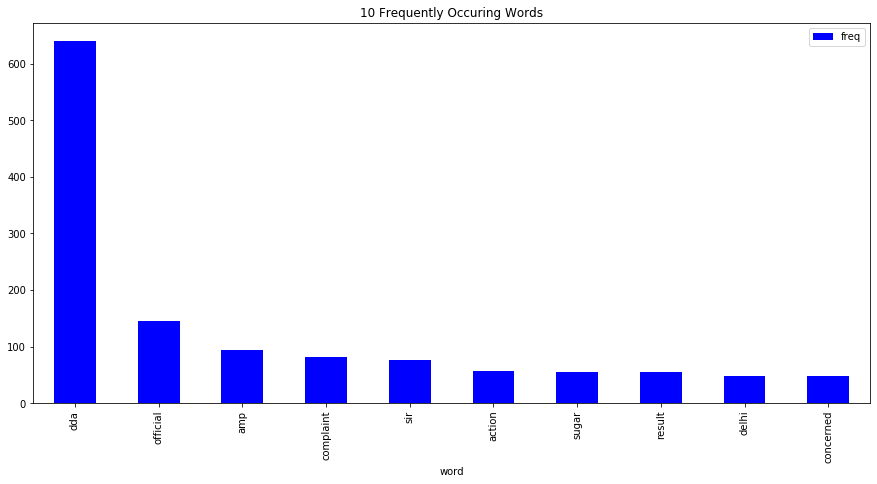

In [40]:
# frequency count and wordclouds using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df['Tweets'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(10).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("10 Frequently Occuring Words")

Text(0.5, 1.0, 'WordCloud')

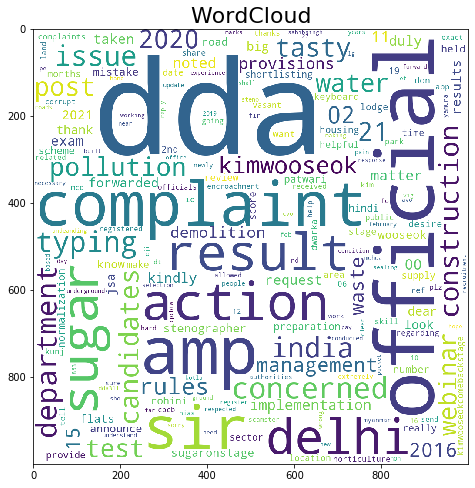

In [41]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud", fontsize = 22)

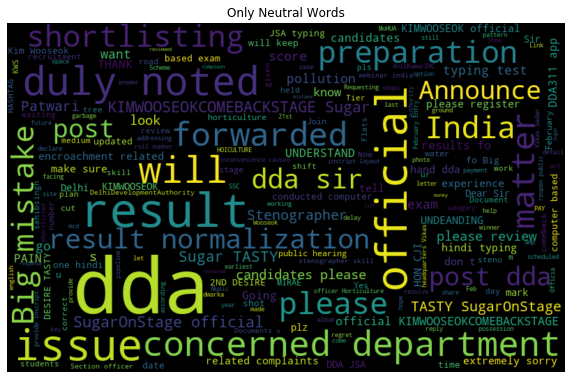

In [42]:
nuetral_word =' '.join([text for text in df['Tweets'][df['Polarity'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(nuetral_word)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Only Neutral Words')
plt.show()

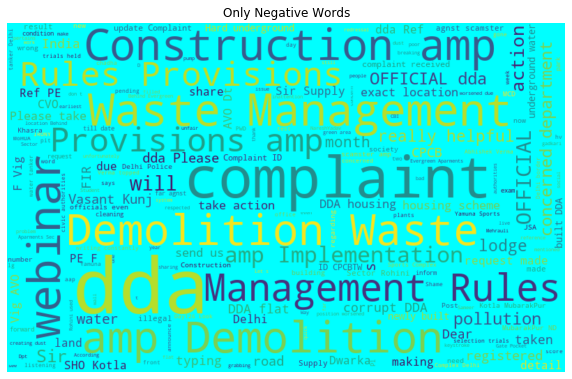

In [43]:
negative_words =' '.join([text for text in df['Tweets'][df['Polarity'] == -1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Only Negative Words')
plt.show()

In [44]:
# saving dataframe to external csv file to visualise the data.

df.to_csv('latest_tweets_location.csv')

(619, 4)